## Loan Approval Prediction


This notebook develops a predictive model using a decision tree algorithm in Python to determine loan approval outcomes. It utilizes the loan status prediction dataset available on Kaggle (https://www.kaggle.com/datasets/bhavikjikadara/loan-status-prediction/data). The primary focus is on:

1. Data Preparation: Processing and preparing the dataset for modeling.
2. Model Development: Building a decision tree model to predict loan approval.
3. Evaluation: Assessing the model's performance in terms of accuracy and reliability.
The objective is to establish a predictive framework that can accurately assess loan approval probabilities, facilitating informed decision-making processes.

## Import packages and read the dataset

In [1]:
import pandas as pd # for data manipulation
from sklearn.tree import DecisionTreeClassifier # to make the model
from sklearn.model_selection import train_test_split # to split the data into train/test
from sklearn import metrics # to get accuracy metrics
import matplotlib.pyplot as plt # for data viz
import seaborn as sns

In [2]:
loan_df = pd.read_csv('loan_data.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'loan_data.csv'

In [109]:
loan_df = loan_df.drop(["Loan_ID"], axis = 1) # Drop the ID column as it's not necessary for the model

## Convert categorical columns to "dummy"/numerical columns to make them usable for the model

In [110]:
loan_df = pd.get_dummies(loan_df, columns = [ 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Property_Area', 'Loan_Status']) 

In [111]:
loan_df = loan_df.apply(pd.to_numeric) # Convert True/False values to numbers

In [112]:
loan_df.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Loan_Status_N', 'Loan_Status_Y'],
      dtype='object')

In [113]:
loan_df = loan_df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 'Self_Employed_No', 'Loan_Status_N'], axis = 1) # We don't need these columns as there are only 2 values, and these are therefore redundant. For example, if a person is not married, this is already included in 'Married_Yes"

## Visualize the relationship between the predictors and output

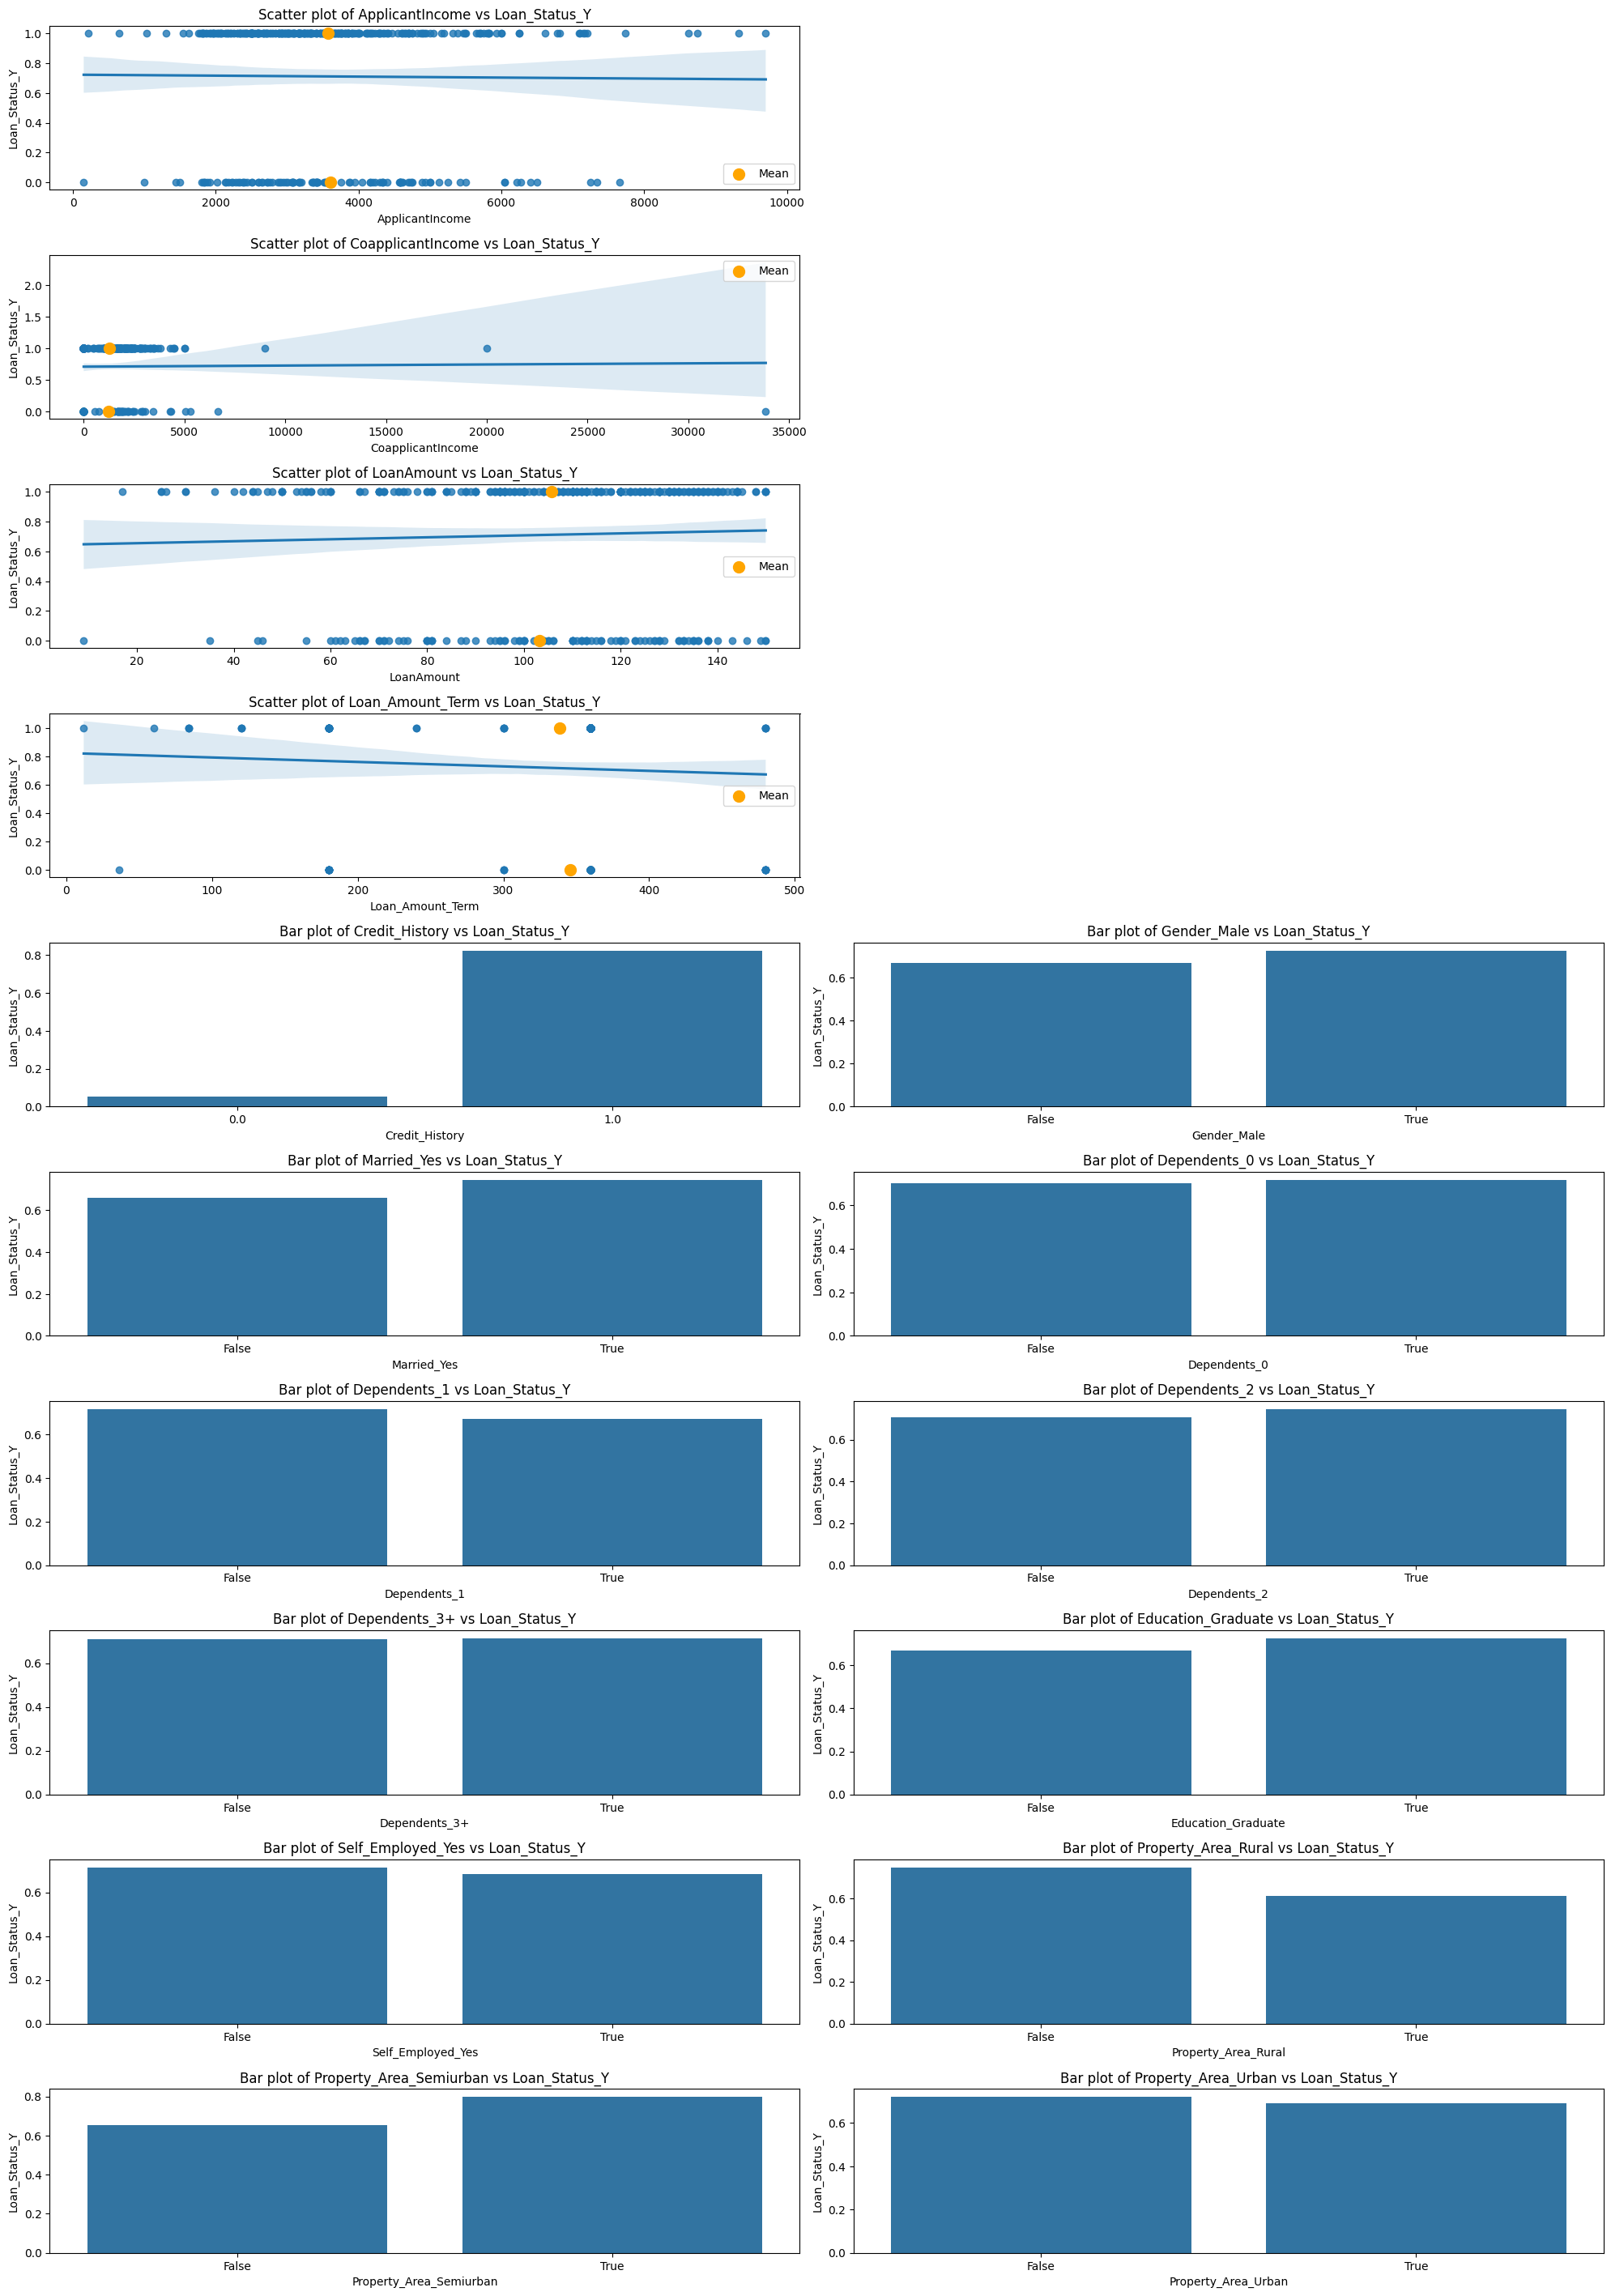

In [144]:


# List of numerical and categorical columns
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
categorical_columns = [ 'Credit_History','Gender_Male','Married_Yes', 'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Education_Graduate',  'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban']

# Set up the matplotlib figure
plt.figure(figsize=(20, 45))

# Generate reg plots for numerical variables
for i, col in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns) + len(categorical_columns), 2, 2*i+1)
    sns.regplot(data=loan_df, x=col, y='Loan_Status_Y')
    plt.title(f'Scatter plot of {col} vs Loan_Status_Y')
    # Calculate means for Loan_Status_Y = 0 and 1
    means = loan_df.groupby('Loan_Status_Y')[col].mean()
    # Plot these means as orange dots
    plt.scatter(means.values, means.index, color='orange', s=100, label='Mean')
    plt.legend()

# Generate bar plots for categorical variables
for i, col in enumerate(categorical_columns):
    plt.subplot(len(numerical_columns) + len(categorical_columns), 2, len(numerical_columns)*2 + i+1)
    sns.barplot(data=loan_df, x=col, y='Loan_Status_Y', errorbar=None)
    plt.title(f'Bar plot of {col} vs Loan_Status_Y')

plt.tight_layout()
plt.show()


## Make the model

In [116]:
loan_df.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Graduate', 'Self_Employed_Yes', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status_Y'],
      dtype='object')

In [120]:
X = loan_df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Graduate', 'Self_Employed_Yes', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban']]
y = loan_df['Loan_Status_Y']

In [121]:
# Split the dataset into a training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21) 


In [122]:
# create and train the model
clf = DecisionTreeClassifier()

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)


## Evaluate the model

In [123]:
# Print the accuracy of the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8051948051948052


In [124]:
importance_df = pd.DataFrame(X.columns, clf.feature_importances_).sort_index(ascending=False) # Create an importance dataframe so we can view how important each variable was

In [125]:
importance_df.reset_index(inplace=True) # make the importance value a column
importance_df.columns = [['Importance Score', 'Column']]

In [126]:
importance_df # Print the importance scores of each predictor

,Importance Score,Column
0,0.362341,Credit_History
1,0.215540,ApplicantIncome
2,0.115934,CoapplicantIncome
3,0.099656,LoanAmount
4,0.038292,Loan_Amount_Term
5,0.033655,Property_Area_Rural
6,0.026446,Married_Yes
7,0.024323,Dependents_2
8,0.022611,Dependents_0
9,0.014191,Dependents_1
